Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


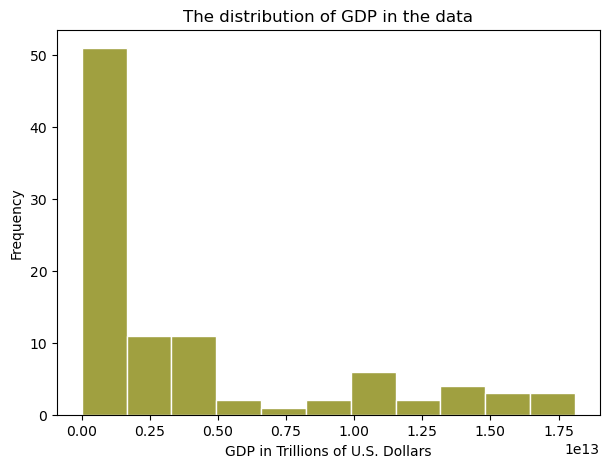

<Figure size 640x480 with 0 Axes>

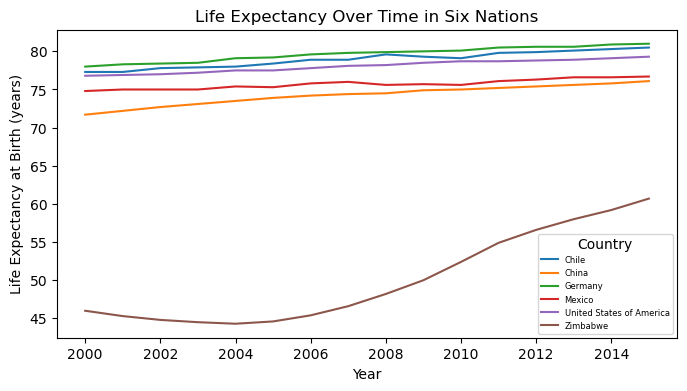

<Figure size 640x480 with 0 Axes>

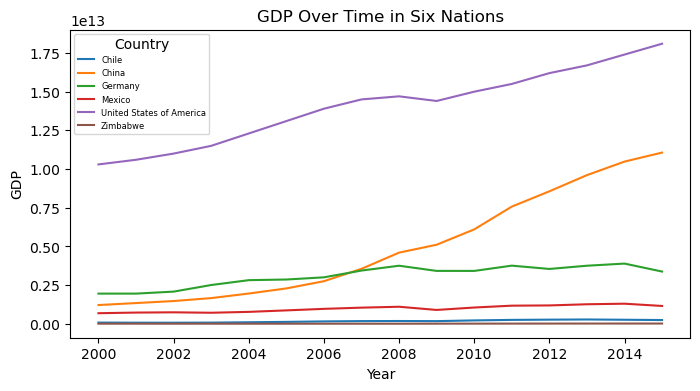

                    Country  LEAB(years)           GDP
0                     Chile     78.94375  1.697888e+11
1                     China     74.26250  4.957714e+12
2                   Germany     79.65625  3.094776e+12
3                    Mexico     75.71875  9.766506e+11
4  United States of America     78.06250  1.407500e+13
5                  Zimbabwe     50.09375  9.062580e+09


<Figure size 640x480 with 0 Axes>

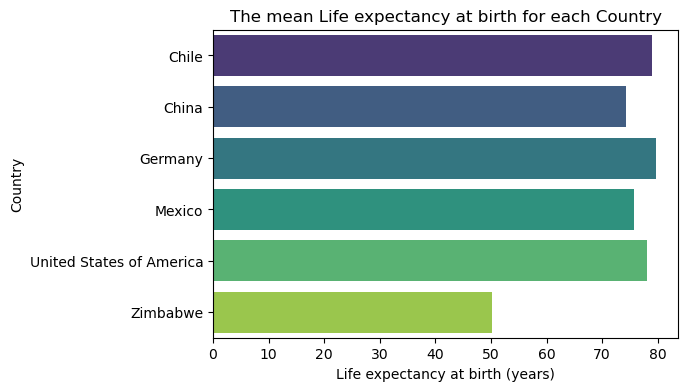

<Figure size 640x480 with 0 Axes>

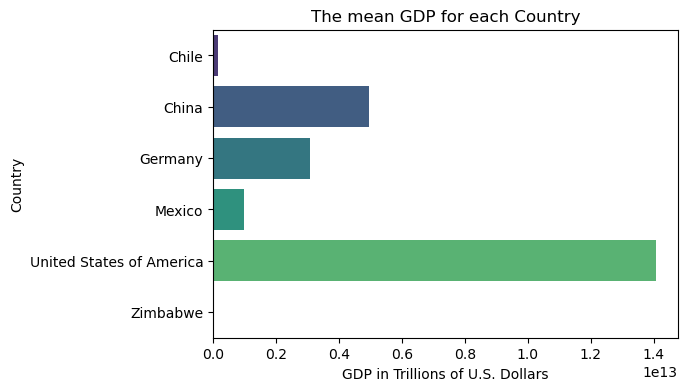

<Figure size 640x480 with 0 Axes>

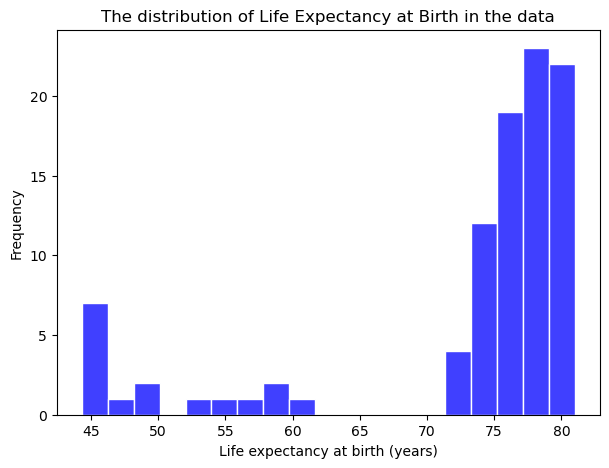

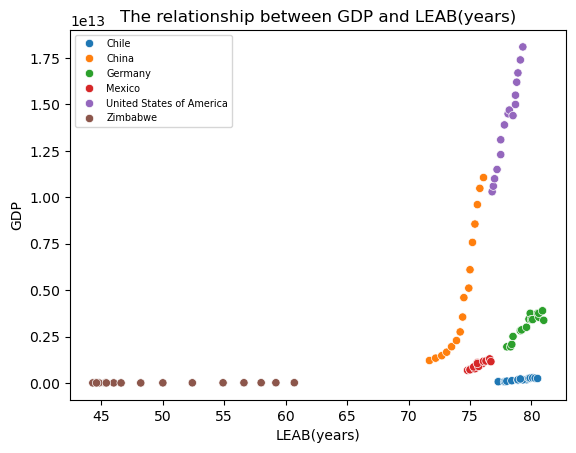

<Figure size 640x480 with 0 Axes>

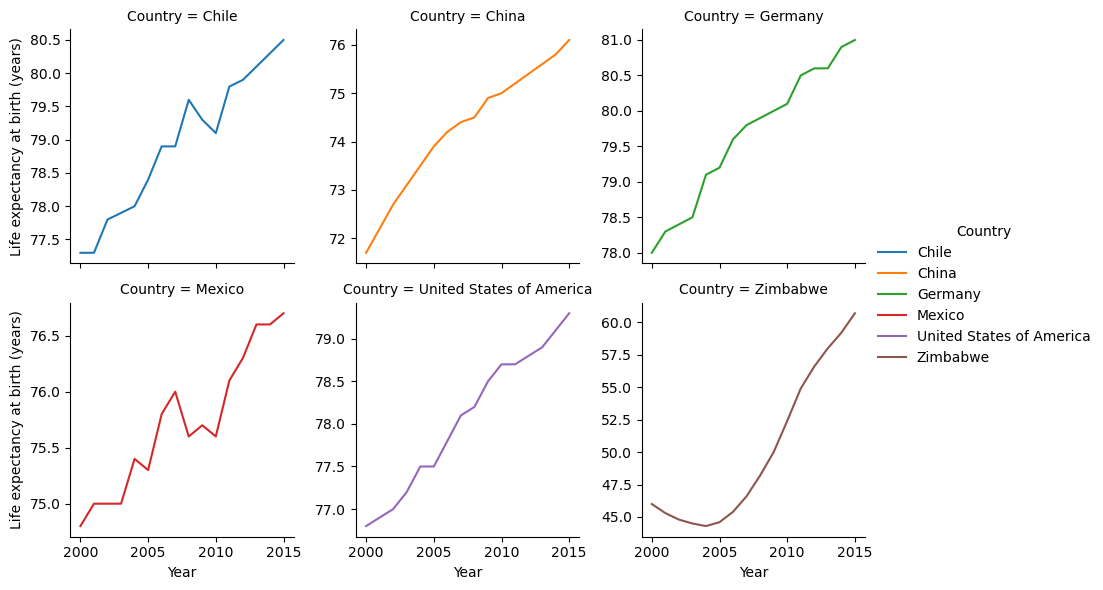

<Figure size 640x480 with 0 Axes>

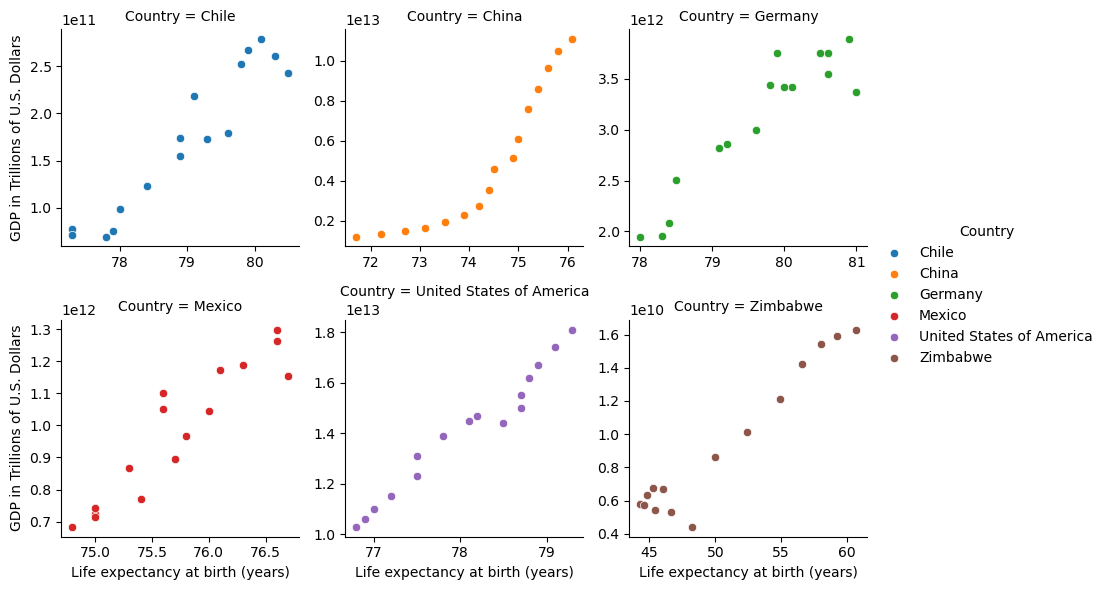

<Figure size 640x480 with 0 Axes>

In [262]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Here are a few questions that this project will seek to answer:

# Has life expectancy increased over time in the six nations?
# Has GDP increased over time in the six nations?
# Is there a correlation between GDP and life expectancy of a country?
# What is the average life expectancy in these nations?
# What is the distribution of that life expectancy?

# EDA
df = pd.read_csv('all_data.csv')
df.head

empty_data = df.isnull().sum()
print(empty_data)

print(df.Country.unique())
print(df.Year.unique())

df = df.rename({"Life expectancy at birth (years)": "LEAB(years)"}, axis='columns')
df.head()

# Vizualization data to explore
# The distribution of GDP in the data
plt.figure(figsize=(7,5))
sns.histplot(df.GDP, kde=False, color='olive', edgecolor='white')
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Frequency")
plt.title("The distribution of GDP in the data")
plt.show()
plt.clf()

# Life Expectancy Over Time in Six Nations
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Year', y='LEAB(years)', hue='Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.title('Life Expectancy Over Time in Six Nations')
plt.legend(title='Country', loc='lower right', fontsize=6)
plt.show()
plt.clf()

# GDP Over Time in Six Nations
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Over Time in Six Nations')
plt.legend(title='Country', loc='upper left', fontsize=6)
plt.show()
plt.clf()

# The mean Life expectancy at birth for each Country
GDP_LEAB_Means = df.drop("Year", axis=1).groupby("Country").agg('mean').reset_index()
print(LEAB_Means)

plt.figure(figsize=(6,4))
sns.barplot(x="LEAB(years)", y="Country", data=GDP_LEAB_Means, hue="Country", dodge=False, palette="viridis")
plt.xlabel("Life expectancy at birth (years)")
plt.title("The mean Life expectancy at birth for each Country")
plt.show()
plt.clf()

# The mean GDP for each Country
plt.figure(figsize=(6,4))
sns.barplot(x="GDP", y="Country", data=GDP_LEAB_Means, hue="Country", dodge=False, palette="viridis")
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title("The mean GDP for each Country")
plt.show()
plt.clf()

# Life Expectancy at Birth
plt.figure(figsize=(7,5))
sns.histplot(df['LEAB(years)'], color='Blue', edgecolor='white', kde=False)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("Frequency")
plt.title("The distribution of Life Expectancy at Birth in the data")
plt.show()
plt.clf()

# The relationship between GDP and LEAB(years)
sns.scatterplot(x=df['LEAB(years)'], y=df.GDP, hue=df.Country)
plt.legend(loc='upper left', fontsize=7, ncol=1)
plt.title("The relationship between GDP and LEAB(years)")
plt.show()
plt.clf()

# The Life expectancy at birth changing over Time by each Country
graphLEAB = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEAB = (graphLEAB.map(sns.lineplot,"Year","LEAB(years)")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))
graphLEAB
plt.show()
plt.clf()

# The Relationship between the Life expectancy at birth GDP by each Country
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEAB(years)", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))
plt.show()
plt.clf()